In [1]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [7]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))


In [9]:
genre_word = [(genre, word)
              for genre in ['news', 'romance']
              for word in brown.words(categories=genre)]


In [12]:
len(genre_word)

170576

In [14]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [16]:
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

In [18]:
cfd = nltk.ConditionalFreqDist(genre_word)

In [20]:
cfd

<ConditionalFreqDist with 2 conditions>

In [22]:
cfd.conditions()

['news', 'romance']

In [24]:
print(cfd['news'])

<FreqDist with 14394 samples and 100554 outcomes>


In [26]:
print(cfd['romance'])

<FreqDist with 8452 samples and 70022 outcomes>


In [30]:
cfd['romance'].most_common(20)

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993),
 ('I', 951),
 ('in', 875),
 ('he', 702),
 ('had', 692),
 ('?', 690),
 ('her', 651),
 ('that', 583),
 ('it', 573),
 ('his', 559),
 ('she', 496)]

# 2.3   Plotting and Tabulating Distributions

In [2]:
import nltk
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [46]:
from nltk.corpus import inaugural

In [47]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))


In [3]:
import nltk
nltk.download('udhr')

[nltk_data] Downloading package udhr to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Unzipping corpora/udhr.zip.


True

In [49]:
languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']

In [52]:
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

In [54]:
cfd.tabulate(conditions=['English', 'German_Deutsch'],samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


# 2.4 Generating Random Text with Bigrams

In [56]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven','and', 'the', 'earth', '.']

In [58]:
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [60]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

In [62]:
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [64]:
cfd['living']

FreqDist({'creature': 7, 'thing': 4, 'substance': 2, 'soul': 1, '.': 1, ',': 1})

In [66]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

# 3  Creating Programs with a Text Editor

In [69]:
from __future__ import division

In [73]:
 def lexical_diversity(text):
        return len(text) / len(set(text))

In [75]:
 def lexical_diversity(my_text_data):
        word_count = len(my_text_data)
        vocab_size = len(set(my_text_data))
        diversity_score = vocab_size / word_count
        return diversity_score

In [77]:
from nltk.corpus import genesis

In [79]:
kjv = genesis.words('english-kjv.txt')

In [81]:
lexical_diversity(kjv)

0.06230453042623537

In [83]:
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

In [85]:
plural('fairy')

'fairies'

In [87]:
plural('woman')

'women'

# 3.3   Modules

# 4.1   Wordlist Corpora

In [98]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [100]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations',
 'accompanied',
 'accounted',
 'accounts',
 'accustomary',
 'aches',
 'acknowledging',
 'acknowledgment',
 'acknowledgments',
 'acquaintances',
 'acquiesced',
 'acquitted',
 'acquitting',
 'acted',
 'actions',
 'adapted',
 'adding',
 'additions',
 'addressed',
 'addresses',
 'addressing',
 'adhering',
 'adieus',
 'adjusting',
 'administering',
 'admirers',
 'admires',
 'admitting',
 'adorned',
 'advances',
 'advantages',
 'affairs',
 'affections',
 'affects',
 'affixed',
 'afflictions',
 'afforded',
 'affording',
 'ages',
 'agitated',
 'agonies',
 'ailments',
 'aimed',
 'alarms',
 'alienated',
 'alighted',
 'alleged',
 'allenham',
 'allowances',
 'allowed',
 'allowing',
 'alluded',
 'alterations',
 'altered',
 'altering',
 'amended',
 'amounted',
 'amusements',
 'ankles',
 'annamaria',
 'annexed',
 'announced',
 'announcing',
 'annuities',
 'annum',
 

In [105]:
unusual_words(nltk.corpus.nps_chat.words())

['aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'abortions',
 'abou',
 'abourted',
 'abs',
 'ack',
 'acros',
 'actualy',
 'adams',
 'adds',
 'adduser',
 'adjusts',
 'adoted',
 'adreniline',
 'ads',
 'adults',
 'afe',
 'affairs',
 'affari',
 'affects',
 'afk',
 'agaibn',
 'ages',
 'aggravated',
 'agurlwithbigguns',
 'ahah',
 'ahahah',
 'ahahh',
 'ahahha',
 'ahh',
 'ahhah',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'aiiiiiiiiiiiiiiiiiiiiiiii',
 'aiken',
 'aime',
 'akdt',
 'akon',
 'akron',
 'akst',
 'aligator',
 'allergies',
 'allo',
 'allowed',
 'aloha',
 'alohaaa',
 'alohas',
 'alot',
 'alotta',
 'alternatives',
 'alterz',
 'alwys',
 'alzheimers',
 'amazingness',
 'americans',
 'anithing',
 'ans',
 'answering',
 'answers',
 'antidepressants',
 'anygirl',
 'anymore',
 'anythin',
 'anytime',
 'anyyyyyyyyyyyyyyyyy',
 'aok',
 'apoligize',
 'appearently',
 'appears',
 'applaudes',
 'appleton',
 'appologise',
 'appologize',
 'aqwesome',
 'arggghhh',
 'argh',
 'armtnpeat',
 'arres

In [107]:
from nltk.corpus import stopwords

In [109]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [111]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosostros',
 'vosostras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestr

In [123]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)


In [126]:
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

In [128]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters] 

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

In [131]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [135]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

In [137]:
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))

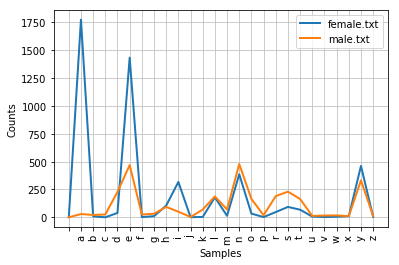

In [140]:
cfd.plot()

# 4.2   A Pronouncing Dictionary

In [144]:
entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [146]:
for entry in entries[42371:42379]:print(entry)

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


In [148]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron 
        if ph1 == 'P' and ph3 == 'T':
            print(word, ph2, end=' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

In [151]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics',
 'conics',
 'cryogenics',
 'cynics',
 'diasonics',
 "dominic's",
 'ebonics',
 'electronics',
 "electronics'",
 "endotronics'",
 'endotronics',
 'enix',
 'environics',
 'ethnics',
 'eugenics',
 'fibronics',
 'flextronics',
 'harmonics',
 'hispanics',
 'histrionics',
 'identics',
 'ionics',
 'kibbutzniks',
 'lasersonics',
 'lumonics',
 'mannix',
 'mechanics',
 "mechanics'",
 'microelectronics',
 'minix',
 'minnix',
 'mnemonics',
 'mnemonics',
 'molonicks',
 'mullenix',
 'mullenix',
 'mullinix',
 'mulnix',
 "munich's",
 'nucleonics',
 'onyx',
 'organics',
 "panic's",
 'panics',
 'penix',
 'pennix',
 'personics',
 'phenix',
 "philharmonic's",
 'phoenix',
 'phonics',
 'photronics',
 'pinnix',
 'plantronics',
 'pyrotechnics',
 'refuseniks',
 "resnick's",
 'respironics',
 'sconnix',
 'siliconix',
 'skolniks',
 'sonics',
 'sputniks',
 'technics

In [153]:
[w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n']

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

In [155]:
sorted(set(w[:2] for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))

['gn', 'kn', 'mn', 'pn']

In [157]:
 def stress(pron):
        return [char for phone in pron for char in phone if char.isdigit()]

In [159]:
 [w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']]

['abbreviated',
 'abbreviated',
 'abbreviating',
 'accelerated',
 'accelerating',
 'accelerator',
 'accelerators',
 'accentuated',
 'accentuating',
 'accommodated',
 'accommodating',
 'accommodative',
 'accumulated',
 'accumulating',
 'accumulative',
 'accumulator',
 'accumulators',
 'accusatory',
 'adenovirus',
 'adjudicated',
 'adjudicating',
 'administrating',
 'administrative',
 'administrator',
 "administrators'",
 "administrator's",
 'administrators',
 'adulterated',
 'adventurism',
 'adventurism',
 'affiliated',
 'affiliated',
 "affiliated's",
 'affiliating',
 'alleviated',
 'alleviated',
 'alleviating',
 'alliteration',
 'alliterative',
 'amalgamated',
 "amalgamated's",
 'amalgamating',
 'ameliorated',
 'ameridata',
 'amoxicillin',
 'anachronism',
 'anachronisms',
 'annihilated',
 'annihilating',
 'antagonism',
 'antagonisms',
 'antagonizing',
 'anticipated',
 'anticipated',
 'anticipating',
 'apologizes',
 'apologizing',
 'apothecary',
 'appreciated',
 'appreciating',
 'apprec

In [161]:
[w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']]

['abbreviation',
 'abbreviations',
 'abomination',
 'abortifacient',
 'abortifacients',
 'academicians',
 'accommodation',
 'accommodations',
 'accreditation',
 'accreditations',
 'accumulation',
 'accumulations',
 'acetylcholine',
 'acetylcholine',
 'adjudication',
 'administration',
 "administration's",
 'administrations',
 "administrations'",
 'aduliadae',
 'adulteration',
 'affiliation',
 'affiliations',
 'aficionados',
 'agglomeration',
 'ahasuerus',
 'ajinomoto',
 'alleviation',
 'amalgamation',
 'ambrosiano',
 'amelioration',
 'americana',
 "americana's",
 'americanas',
 'americano',
 'americanos',
 'anachronistic',
 'anencephalic',
 'annihilation',
 'antagonistic',
 'anticipation',
 'anticipations',
 'apocalyptic',
 'apologetic',
 'apotheosis',
 'appreciation',
 'appropriation',
 'appropriations',
 'approximation',
 'approximations',
 'aristocratic',
 'arunachalam',
 'assassination',
 'assassinations',
 'assimilation',
 'association',
 'association',
 'associations',
 "associat

In [164]:
 p3 = [(pron[0]+'-'+pron[2], word)
       for (word, pron) in entries
       if pron[0] == 'P' and len(pron) == 3] 
cfd = nltk.ConditionalFreqDist(p3)

In [166]:
for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + "...")
        

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


In [170]:
prondict = nltk.corpus.cmudict.dict()
prondict['fire']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

In [173]:
prondict['blog']
#wrong syntax to show The word blog is missing from the pronouncing dictionary, so we tweak our version by assigning a value for this key

KeyError: 'blog'

In [175]:
prondict['blog'] = [['B', 'L', 'AA1', 'G']] 
prondict['blog']

[['B', 'L', 'AA1', 'G']]

In [177]:
text = ['natural', 'language', 'processing']
[ph for w in text for ph in prondict[w][0]]

['N',
 'AE1',
 'CH',
 'ER0',
 'AH0',
 'L',
 'L',
 'AE1',
 'NG',
 'G',
 'W',
 'AH0',
 'JH',
 'P',
 'R',
 'AA1',
 'S',
 'EH0',
 'S',
 'IH0',
 'NG']

# 4.3   Comparative Wordlists

In [180]:
from nltk.corpus import swadesh
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [182]:
swadesh.words('en')

['I',
 'you (singular), thou',
 'he',
 'we',
 'you (plural)',
 'they',
 'this',
 'that',
 'here',
 'there',
 'who',
 'what',
 'where',
 'when',
 'how',
 'not',
 'all',
 'many',
 'some',
 'few',
 'other',
 'one',
 'two',
 'three',
 'four',
 'five',
 'big',
 'long',
 'wide',
 'thick',
 'heavy',
 'small',
 'short',
 'narrow',
 'thin',
 'woman',
 'man (adult male)',
 'man (human being)',
 'child',
 'wife',
 'husband',
 'mother',
 'father',
 'animal',
 'fish',
 'bird',
 'dog',
 'louse',
 'snake',
 'worm',
 'tree',
 'forest',
 'stick',
 'fruit',
 'seed',
 'leaf',
 'root',
 'bark (from tree)',
 'flower',
 'grass',
 'rope',
 'skin',
 'meat',
 'blood',
 'bone',
 'fat (noun)',
 'egg',
 'horn',
 'tail',
 'feather',
 'hair',
 'head',
 'ear',
 'eye',
 'nose',
 'mouth',
 'tooth',
 'tongue',
 'fingernail',
 'foot',
 'leg',
 'knee',
 'hand',
 'wing',
 'belly',
 'guts',
 'neck',
 'back',
 'breast',
 'heart',
 'liver',
 'drink',
 'eat',
 'bite',
 'suck',
 'spit',
 'vomit',
 'blow',
 'breathe',
 'laugh',

In [185]:
fr2en = swadesh.entries(['fr', 'en'])
fr2en

[('je', 'I'),
 ('tu, vous', 'you (singular), thou'),
 ('il', 'he'),
 ('nous', 'we'),
 ('vous', 'you (plural)'),
 ('ils, elles', 'they'),
 ('ceci', 'this'),
 ('cela', 'that'),
 ('ici', 'here'),
 ('là', 'there'),
 ('qui', 'who'),
 ('quoi', 'what'),
 ('où', 'where'),
 ('quand', 'when'),
 ('comment', 'how'),
 ('ne...pas', 'not'),
 ('tout', 'all'),
 ('plusieurs', 'many'),
 ('quelques', 'some'),
 ('peu', 'few'),
 ('autre', 'other'),
 ('un', 'one'),
 ('deux', 'two'),
 ('trois', 'three'),
 ('quatre', 'four'),
 ('cinq', 'five'),
 ('grand', 'big'),
 ('long', 'long'),
 ('large', 'wide'),
 ('épais', 'thick'),
 ('lourd', 'heavy'),
 ('petit', 'small'),
 ('court', 'short'),
 ('étroit', 'narrow'),
 ('mince', 'thin'),
 ('femme', 'woman'),
 ('homme', 'man (adult male)'),
 ('homme', 'man (human being)'),
 ('enfant', 'child'),
 ('femme, épouse', 'wife'),
 ('mari, époux', 'husband'),
 ('mère', 'mother'),
 ('père', 'father'),
 ('animal', 'animal'),
 ('poisson', 'fish'),
 ('oiseau', 'bird'),
 ('chien', 'dog'

In [187]:
translate = dict(fr2en)

In [189]:
translate['chien']

'dog'

In [191]:
translate['jeter']

'throw'

In [198]:
de2en = swadesh.entries(['de', 'en'])
es2en = swadesh.entries(['es', 'en'])
translate.update(dict(de2en))
translate.update(dict(es2en))
translate['Hund']

'dog'

In [200]:
translate['perro']

'dog'

In [202]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
    print(swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


In [206]:
 from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')

[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

# 5.1   Senses and Synonyms

In [208]:
 from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [210]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [212]:
 wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [214]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [216]:
wn.synset('car.n.01').lemmas() 

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [218]:
wn.lemma('car.n.01.automobile') 

Lemma('car.n.01.automobile')

In [220]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [222]:
wn.lemma('car.n.01.automobile').name()

'automobile'

In [224]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [226]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [228]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

In [230]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]

Synset('ambulance.n.01')

In [232]:
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

In [234]:
 motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [236]:
paths = motorcar.hypernym_paths()
len(paths)

2

In [238]:
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [240]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

# 5.3   More Lexical Relations

In [242]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [244]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [246]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [248]:
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [250]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [252]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

In [254]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [256]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [258]:
wn.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

In [260]:
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [262]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [264]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('vertical.a.01.vertical'), Lemma('inclined.a.02.inclined')]

In [266]:
wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

# 5.4   Semantic Similarity

In [269]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [271]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [273]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [275]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

In [277]:
 wn.synset('baleen_whale.n.01').min_depth()
    

14

In [279]:
wn.synset('whale.n.02').min_depth()


13

In [281]:
 wn.synset('vertebrate.n.01').min_depth()


8

In [284]:
 wn.synset('entity.n.01').min_depth()

0

In [286]:
right.path_similarity(minke)

0.25

In [288]:
 right.path_similarity(orca)

0.16666666666666666

In [290]:
right.path_similarity(tortoise)

0.07692307692307693

In [292]:
 right.path_similarity(novel)

0.043478260869565216

# 3   Processing Raw Text

In [27]:
from __future__ import division 
import nltk, re, pprint
from nltk import word_tokenize

# 3.1   Accessing Text from the Web and from Disk

In [28]:
from urllib import request


In [29]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"


In [30]:
response = request.urlopen(url)


In [31]:
raw = response.read().decode('utf8')


In [32]:
type(raw)

str

In [33]:
len(raw)

1176967

In [34]:
raw[:75]

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r'

In [35]:
tokens = word_tokenize(raw)
type(tokens)


list

In [36]:
 len(tokens)

257727

In [37]:
tokens[:10]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

In [38]:
text = nltk.Text(tokens)
type(text)

nltk.text.Text

In [39]:
text[1021:1059]

['CHAPTER',
 'I',
 'On',
 'an',
 'exceptionally',
 'hot',
 'evening',
 'early',
 'in',
 'July',
 'a',
 'young',
 'man',
 'came',
 'out',
 'of',
 'the',
 'garret',
 'in',
 'which',
 'he',
 'lodged',
 'in',
 'S.',
 'Place',
 'and',
 'walked',
 'slowly',
 ',',
 'as',
 'though',
 'in',
 'hesitation',
 ',',
 'towards',
 'K.',
 'bridge',
 '.']

In [40]:
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Ilya Petrovitch; Project
Gutenberg; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


In [41]:
raw.find("PART I")

5336

In [42]:
raw.rfind("End of Project Gutenberg's Crime")

-1

In [43]:
raw = raw[5338:1157743]

In [44]:
raw.find("PART I")

195769

In [45]:
#DEALING WITH HTML
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf8')
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [46]:
from bs4 import BeautifulSoup
raw = BeautifulSoup(html).get_text()
tokens = word_tokenize(raw)
tokens

['BBC',
 'NEWS',
 '|',
 'Health',
 '|',
 'Blondes',
 "'to",
 'die',
 'out',
 'in',
 '200',
 "years'",
 'NEWS',
 'SPORT',
 'WEATHER',
 'WORLD',
 'SERVICE',
 'A-Z',
 'INDEX',
 'SEARCH',
 'You',
 'are',
 'in',
 ':',
 'Health',
 'News',
 'Front',
 'Page',
 'Africa',
 'Americas',
 'Asia-Pacific',
 'Europe',
 'Middle',
 'East',
 'South',
 'Asia',
 'UK',
 'Business',
 'Entertainment',
 'Science/Nature',
 'Technology',
 'Health',
 'Medical',
 'notes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Talking',
 'Point',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Country',
 'Profiles',
 'In',
 'Depth',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Programmes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'SERVICES',
 'Daily',
 'E-mail',
 'News',
 'Ticker',
 'Mobile/PDAs',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Text',
 'Only',
 'Feedback',
 'Help',
 'EDITIONS',
 'Change',
 'to',
 'UK',
 'Friday',
 ',',
 '27',
 'September',
 ',',
 '2002',
 ',',
 '11:51',
 'GMT',
 '12:51'

In [47]:
tokens = tokens[110:390]
text = nltk.Text(tokens)
text.concordance('gene')

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


In [4]:
! pip install feedparser

In [49]:
import feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")

In [50]:
llog['feed']['title']

'Language Log'

In [51]:
len(llog.entries)

13

In [52]:
post = llog.entries[2]
post.title

'Deadly homicide'

In [53]:
content = post.content[0].value
content[:70]

'<p>As opposed to the salubrious kind, presumably&#8230;.</p>\n<p>FOX 5 '

In [54]:
raw = BeautifulSoup(content).get_text()
word_tokenize(raw)

['As',
 'opposed',
 'to',
 'the',
 'salubrious',
 'kind',
 ',',
 'presumably…',
 '.',
 'FOX',
 '5',
 'DC',
 'News',
 '(',
 '3/3/19',
 ')',
 'headline',
 ':',
 "''",
 'Fairfax',
 'County',
 'police',
 'identify',
 'victims',
 'of',
 'deadly',
 'triple',
 'homicide',
 'in',
 'Springfield',
 "''",
 'Fairfax',
 'County',
 'police',
 'have',
 'identified',
 'the',
 'three',
 'people',
 'found',
 'shot',
 'dead',
 'at',
 'a',
 'home',
 'in',
 'Springfield',
 'overnight',
 '.',
 'As',
 'Bob',
 'Dylan',
 'and',
 'Paula',
 'Cole',
 'might',
 'have',
 'sung',
 ',',
 '``',
 'Where',
 'have',
 'all',
 'the',
 'editors',
 'gone',
 '…',
 "''",
 '[',
 'h.t',
 '.',
 'Don',
 'Keyser',
 ']']

In [55]:
f = open('Documents/top_level.txt')
raw = f.read()
print(raw)

feedparser

hello
jupyter
untitled
11


In [56]:
f = open('Documents/top_level.txt', 'r')
for line in f:
    print(line.strip())

feedparser

hello
jupyter
untitled
11


In [57]:
path = nltk.data.find('corpora/gutenberg/melville-moby_dick.txt')
raw = open(path, 'r').read()


In [58]:
 s = input("Enter some text: ")
print("You typed", len(word_tokenize(s)), "words.")

Enter some text: 
You typed 0 words.


In [59]:
raw = open('Documents/top_level.txt').read()
type(raw)


str

In [60]:
tokens = word_tokenize(raw)
type(tokens)

list

In [64]:
words = [w.lower() for w in tokens]
type(words)

list

In [66]:
vocab = sorted(set(words))
type(vocab)

list

In [71]:
#WRONG SYNTAX The type of an object determines what operations you can perform on it. So, for example, we can append to a list but not to a string:
vocab.append('blog')
raw.append('blog')

AttributeError: 'str' object has no attribute 'append'

In [74]:
monty = 'Monty Python'
monty

'Monty Python'

In [76]:
circus = "Monty Python's Flying Circus"
circus

"Monty Python's Flying Circus"

In [78]:
circus = 'Monty Python\'s Flying Circus'
circus

"Monty Python's Flying Circus"

In [81]:
couplet = "Shall I compare thee to a Summer's day?""Thou are more lovely and more temperate:" 
print(couplet)

Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:


In [83]:
couplet = ("Rough winds do shake the darling buds of May,""And Summer's lease hath all too short a date:")
print(couplet)

Rough winds do shake the darling buds of May,And Summer's lease hath all too short a date:


In [85]:
couplet = """Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:"""
print(couplet)

Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:


In [87]:
couplet = """Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:"""
print(couplet)

Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:


In [89]:
couplet = '''Rough winds do shake the darling buds of May,And Summer's lease hath all too short a date:'''
print(couplet)

Rough winds do shake the darling buds of May,And Summer's lease hath all too short a date:


In [92]:
'very' + 'very' + 'very'


'veryveryvery'

In [93]:
'very' * 3

'veryveryvery'

In [95]:
a = [1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1]

In [99]:
 b = [' ' * 2 * (7 - i) + 'very' * i for i in a]
for line in b:
    print(line)

            very
          veryvery
        veryveryvery
      veryveryveryvery
    veryveryveryveryvery
  veryveryveryveryveryvery
veryveryveryveryveryveryvery
  veryveryveryveryveryvery
    veryveryveryveryvery
      veryveryveryvery
        veryveryvery
          veryvery
            very


In [101]:
grail = 'Holy Grail'
print(monty + grail)

Monty PythonHoly Grail


In [103]:
print(monty, grail)

Monty Python Holy Grail


In [105]:
print(monty, "and the", grail)

Monty Python and the Holy Grail


In [107]:
monty[0]

'M'

In [109]:
monty[1]

'o'

In [111]:
monty[5]

' '

In [113]:
sent = 'colorless green ideas sleep furiously'
for char in sent:
    print(char, end=' ')

c o l o r l e s s   g r e e n   i d e a s   s l e e p   f u r i o u s l y 

In [115]:
from nltk.corpus import gutenberg
raw = gutenberg.raw('melville-moby_dick.txt')
fdist = nltk.FreqDist(ch.lower() for ch in raw if ch.isalpha())
fdist.most_common(5)

[('e', 117092), ('t', 87996), ('a', 77916), ('o', 69326), ('n', 65617)]

In [117]:
[char for (char, count) in fdist.most_common()]

['e',
 't',
 'a',
 'o',
 'n',
 'i',
 's',
 'h',
 'r',
 'l',
 'd',
 'u',
 'm',
 'c',
 'w',
 'f',
 'g',
 'p',
 'b',
 'y',
 'v',
 'k',
 'q',
 'j',
 'x',
 'z']

In [119]:
monty[7:10]

'yth'

In [124]:
monty[:5]


'Monty'

In [126]:
monty[:7]

'Monty P'

In [128]:
monty[7:]

'ython'

In [130]:
phrase = 'And now for something completely different'
if 'thing' in phrase:
    print('found "thing"')

found "thing"


In [132]:
 monty.find('Python')

6

In [134]:
query = 'Who knows?'

In [136]:
beatles = ['John', 'Paul', 'George', 'Ringo']
query[2]

'o'

In [138]:
beatles[2]

'George'

In [140]:
 query[:2]

'Wh'

In [142]:
beatles[:2]

['John', 'Paul']

In [144]:
query + " I don't"

"Who knows? I don't"

In [146]:
beatles + ['Brian']

['John', 'Paul', 'George', 'Ringo', 'Brian']

In [148]:
beatles[0] = "John Lennon"
del beatles[-1]
beatles

['John Lennon', 'Paul']

# 3.3   Text Processing with Unicode 

In [160]:
path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')

In [161]:
f = open(path, encoding='latin2')

In [162]:
for line in f:
    line = line.strip()
    print(line)

Pruska Biblioteka Państwowa. Jej dawne zbiory znane pod nazwą
"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez
Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały
odnalezione po 1945 r. na terytorium Polski. Trafiły do Biblioteki
Jagiellońskiej w Krakowie, obejmują ponad 500 tys. zabytkowych
archiwaliów, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.


In [164]:
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line.encode('unicode_escape'))

b'Pruska Biblioteka Pa\\u0144stwowa. Jej dawne zbiory znane pod nazw\\u0105'
b'"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez'
b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y'
b'odnalezione po 1945 r. na terytorium Polski. Trafi\\u0142y do Biblioteki'
b'Jagiello\\u0144skiej w Krakowie, obejmuj\\u0105 ponad 500 tys. zabytkowych'
b'archiwali\\xf3w, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.'


In [166]:
ord('ń')

324

In [168]:
nacute = '\u0144'
nacute

'ń'

In [170]:
 nacute.encode('utf8')

b'\xc5\x84'

In [172]:
import unicodedata
lines = open(path, encoding='latin2').readlines()
line = lines[2]
print(line.encode('unicode_escape'))

b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y\\n'


In [174]:
for c in line:
    if ord(c) > 127:
        print('{} U+{:04x} {}'.format(c.encode('utf8'), ord(c), unicodedata.name(c)))

b'\xc3\xb3' U+00f3 LATIN SMALL LETTER O WITH ACUTE
b'\xc5\x9b' U+015b LATIN SMALL LETTER S WITH ACUTE
b'\xc5\x9a' U+015a LATIN CAPITAL LETTER S WITH ACUTE
b'\xc4\x85' U+0105 LATIN SMALL LETTER A WITH OGONEK
b'\xc5\x82' U+0142 LATIN SMALL LETTER L WITH STROKE


In [176]:
line.find('zosta\u0142y')

54

In [178]:
line = line.lower()
line

'niemców pod koniec ii wojny światowej na dolny śląsk, zostały\n'

In [180]:
line.encode('unicode_escape')

b'niemc\\xf3w pod koniec ii wojny \\u015bwiatowej na dolny \\u015bl\\u0105sk, zosta\\u0142y\\n'

In [182]:
import re
m = re.search('\u015b\w*', line)
m.group()

'światowej'

In [184]:
word_tokenize(line)

['niemców',
 'pod',
 'koniec',
 'ii',
 'wojny',
 'światowej',
 'na',
 'dolny',
 'śląsk',
 ',',
 'zostały']

# 3.4   Regular Expressions for Detecting Word Patterns

In [186]:
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

In [188]:
 [w for w in wordlist if re.search('ed$', w)]

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded',
 'absorbed',
 'abstracted',
 'abstricted',
 'accelerated',
 'accepted',
 'accidented',
 'accoladed',
 'accolated',
 'accomplished',
 'accosted',
 'accredited',
 'accursed',
 'accused',
 'accustomed',
 'acetated',
 'acheweed',
 'aciculated',
 'aciliated',
 'acknowledged',
 'acorned',
 'acquainted',
 'acquired',
 'acquisited',
 'acred',
 'aculeated',
 'addebted',
 'added',
 'addicted',
 'addlebrained',
 'addleheaded',
 'addlepated',
 'addorsed',
 'adempted',
 'adfected',
 'adjoined',
 'admired',
 'admitted',
 'adnexed',
 'adopted',
 'adossed',
 'adreamed',
 'adscripted',
 'aduncated',
 'advanced',
 'advised',
 'aeried',
 'aethered',
 'afeared',
 'affected',
 'affectioned',
 'affined',
 'afflicted',
 'affricated',
 'affrighted',
 'affronted',
 'aforenamed',
 'afterfeed',
 'aftershafted',
 'afterthoughted',
 'afterwitted',
 'agazed',
 'aged',
 'agglomerated',
 'aggri

In [190]:
 [w for w in wordlist if re.search('^..j..t..$', w)]

['abjectly',
 'adjuster',
 'dejected',
 'dejectly',
 'injector',
 'majestic',
 'objectee',
 'objector',
 'rejecter',
 'rejector',
 'unjilted',
 'unjolted',
 'unjustly']

In [192]:
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]

['gold', 'golf', 'hold', 'hole']

In [194]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$', w)]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [196]:
[w for w in chat_words if re.search('^[ha]+$', w)]

['a',
 'aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'ah',
 'ahah',
 'ahahah',
 'ahh',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'h',
 'ha',
 'haaa',
 'hah',
 'haha',
 'hahaaa',
 'hahah',
 'hahaha',
 'hahahaa',
 'hahahah',
 'hahahaha',
 'hahahahaaa',
 'hahahahahaha',
 'hahahahahahaha',
 'hahahahahahahahahahahahahahahaha',
 'hahahhahah',
 'hahhahahaha']

In [198]:
wsj = sorted(set(nltk.corpus.treebank.words()))
[w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]

['0.0085',
 '0.05',
 '0.1',
 '0.16',
 '0.2',
 '0.25',
 '0.28',
 '0.3',
 '0.4',
 '0.5',
 '0.50',
 '0.54',
 '0.56',
 '0.60',
 '0.7',
 '0.82',
 '0.84',
 '0.9',
 '0.95',
 '0.99',
 '1.01',
 '1.1',
 '1.125',
 '1.14',
 '1.1650',
 '1.17',
 '1.18',
 '1.19',
 '1.2',
 '1.20',
 '1.24',
 '1.25',
 '1.26',
 '1.28',
 '1.35',
 '1.39',
 '1.4',
 '1.457',
 '1.46',
 '1.49',
 '1.5',
 '1.50',
 '1.55',
 '1.56',
 '1.5755',
 '1.5805',
 '1.6',
 '1.61',
 '1.637',
 '1.64',
 '1.65',
 '1.7',
 '1.75',
 '1.76',
 '1.8',
 '1.82',
 '1.8415',
 '1.85',
 '1.8500',
 '1.9',
 '1.916',
 '1.92',
 '10.19',
 '10.2',
 '10.5',
 '107.03',
 '107.9',
 '109.73',
 '11.10',
 '11.5',
 '11.57',
 '11.6',
 '11.72',
 '11.95',
 '112.9',
 '113.2',
 '116.3',
 '116.4',
 '116.7',
 '116.9',
 '118.6',
 '12.09',
 '12.5',
 '12.52',
 '12.68',
 '12.7',
 '12.82',
 '12.97',
 '120.7',
 '1206.26',
 '121.6',
 '126.1',
 '126.15',
 '127.03',
 '129.91',
 '13.1',
 '13.15',
 '13.5',
 '13.50',
 '13.625',
 '13.65',
 '13.73',
 '13.8',
 '13.90',
 '130.6',
 '130.7',
 '

In [200]:
[w for w in wsj if re.search('^[A-Z]+\$$', w)]

['C$', 'US$']

In [202]:
[w for w in wsj if re.search('^[0-9]{4}$', w)]

['1614',
 '1637',
 '1787',
 '1901',
 '1903',
 '1917',
 '1925',
 '1929',
 '1933',
 '1934',
 '1948',
 '1953',
 '1955',
 '1956',
 '1961',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1975',
 '1976',
 '1977',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2005',
 '2009',
 '2017',
 '2019',
 '2029',
 '3057',
 '8300']

In [204]:
[w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]

['10-day',
 '10-lap',
 '10-year',
 '100-share',
 '12-point',
 '12-year',
 '14-hour',
 '15-day',
 '150-point',
 '190-point',
 '20-point',
 '20-stock',
 '21-month',
 '237-seat',
 '240-page',
 '27-year',
 '30-day',
 '30-point',
 '30-share',
 '30-year',
 '300-day',
 '36-day',
 '36-store',
 '42-year',
 '50-state',
 '500-stock',
 '52-week',
 '69-point',
 '84-month',
 '87-store',
 '90-day']

In [206]:
[w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

['black-and-white',
 'bread-and-butter',
 'father-in-law',
 'machine-gun-toting',
 'savings-and-loan']

In [208]:
[w for w in wsj if re.search('(ed|ing)$', w)]

['62%-owned',
 'Absorbed',
 'According',
 'Adopting',
 'Advanced',
 'Advancing',
 'Alfred',
 'Allied',
 'Annualized',
 'Anything',
 'Arbitrage-related',
 'Arbitraging',
 'Asked',
 'Assuming',
 'Atlanta-based',
 'Baking',
 'Banking',
 'Beginning',
 'Beijing',
 'Being',
 'Bermuda-based',
 'Betting',
 'Boeing',
 'Broadcasting',
 'Bucking',
 'Buying',
 'Calif.-based',
 'Change-ringing',
 'Citing',
 'Concerned',
 'Confronted',
 'Conn.based',
 'Consolidated',
 'Continued',
 'Continuing',
 'Declining',
 'Defending',
 'Depending',
 'Designated',
 'Determining',
 'Developed',
 'Died',
 'During',
 'Encouraged',
 'Encouraging',
 'English-speaking',
 'Estimated',
 'Everything',
 'Excluding',
 'Exxon-owned',
 'Faulding',
 'Fed',
 'Feeding',
 'Filling',
 'Filmed',
 'Financing',
 'Following',
 'Founded',
 'Fracturing',
 'Francisco-based',
 'Fred',
 'Funded',
 'Funding',
 'Generalized',
 'Germany-based',
 'Getting',
 'Guaranteed',
 'Having',
 'Heating',
 'Heightened',
 'Holding',
 'Housing',
 'Illumin

# 3.5   Useful Applications of Regular Expressions

In [212]:
word = 'supercalifragilisticexpialidocious'
re.findall(r'[aeiou]', word)

['u',
 'e',
 'a',
 'i',
 'a',
 'i',
 'i',
 'i',
 'e',
 'i',
 'a',
 'i',
 'o',
 'i',
 'o',
 'u']

In [213]:
 len(re.findall(r'[aeiou]', word))

16

In [215]:
wsj = sorted(set(nltk.corpus.treebank.words()))
fd = nltk.FreqDist(vs for word in wsj
                   for vs in re.findall(r'[aeiou]{2,}', word))

In [217]:
fd.most_common(12)

[('io', 549),
 ('ea', 476),
 ('ie', 331),
 ('ou', 329),
 ('ai', 261),
 ('ia', 253),
 ('ee', 217),
 ('oo', 174),
 ('ua', 109),
 ('au', 106),
 ('ue', 105),
 ('ui', 95)]

In [219]:
regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'
def compress(word):
    pieces = re.findall(regexp, word)
    return ''.join(pieces)

In [221]:
english_udhr = nltk.corpus.udhr.words('English-Latin1')
print(nltk.tokenwrap(compress(w) for w in english_udhr[:75]))

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and


In [223]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
cvs = [cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


In [225]:
cv_word_pairs = [(cv, w) for w in rotokas_words
                 for cv in re.findall(r'[ptksvr][aeiou]', w)]

In [227]:
cv_index = nltk.Index(cv_word_pairs)
cv_index['su']

['kasuari']

In [229]:
cv_index['po']

['kaapo',
 'kaapopato',
 'kaipori',
 'kaiporipie',
 'kaiporivira',
 'kapo',
 'kapoa',
 'kapokao',
 'kapokapo',
 'kapokapo',
 'kapokapoa',
 'kapokapoa',
 'kapokapora',
 'kapokapora',
 'kapokaporo',
 'kapokaporo',
 'kapokari',
 'kapokarito',
 'kapokoa',
 'kapoo',
 'kapooto',
 'kapoovira',
 'kapopaa',
 'kaporo',
 'kaporo',
 'kaporopa',
 'kaporoto',
 'kapoto',
 'karokaropo',
 'karopo',
 'kepo',
 'kepoi',
 'keposi',
 'kepoto']

In [231]:
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
        return word

In [233]:
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

In [235]:
 re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['processing']

In [237]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

[('process', 'ing')]

In [239]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('processe', 's')]

In [241]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('process', 'es')]

In [243]:
 re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$', 'language')

[('language', '')]

In [245]:
def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem


In [247]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords is no basis for a system of government.  Supreme executive power derives from a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
[stem(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'women',
 'ly',
 'in',
 'pond',
 'distribut',
 'sword',
 'i',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'Supreme',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

In [249]:
from nltk.corpus import gutenberg, nps_chat
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
moby.findall(r"<a> (<.*>) <man>") 

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


In [252]:
chat = nltk.Text(nps_chat.words())
chat.findall(r"<.*> <.*> <bro>") 

you rule bro; telling you bro; u twizted bro


In [253]:
from nltk.corpus import brown
>>> hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))
>>> hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")

speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals


# 3.6   Normalizing Text


In [256]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords is no basis for a system of government.  Supreme executive power derives from a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)

In [258]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
[porter.stem(t) for t in tokens]


['denni',
 ':',
 'listen',
 ',',
 'strang',
 'women',
 'lie',
 'in',
 'pond',
 'distribut',
 'sword',
 'is',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'suprem',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandat',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcic',
 'aquat',
 'ceremoni',
 '.']

In [260]:
[lancaster.stem(t) for t in tokens]

['den',
 ':',
 'list',
 ',',
 'strange',
 'wom',
 'lying',
 'in',
 'pond',
 'distribut',
 'sword',
 'is',
 'no',
 'bas',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'suprem',
 'execut',
 'pow',
 'der',
 'from',
 'a',
 'mand',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'som',
 'farc',
 'aqu',
 'ceremony',
 '.']

In [262]:
class IndexedText(object):

    def __init__(self, stemmer, text):
        self._text = text
        self._stemmer = stemmer
        self._index = nltk.Index((self._stem(word), i)
                                 for (i, word) in enumerate(text))

    def concordance(self, word, width=40):
        key = self._stem(word)
        wc = int(width/4)                # words of context
        for i in self._index[key]:
            lcontext = ' '.join(self._text[i-wc:i])
            rcontext = ' '.join(self._text[i:i+wc])
            ldisplay = '{:>{width}}'.format(lcontext[-width:], width=width)
            rdisplay = '{:{width}}'.format(rcontext[:width], width=width)
            print(ldisplay, rdisplay)

    def _stem(self, word):
        return self._stemmer.stem(word).lower()

In [264]:
porter = nltk.PorterStemmer()
grail = nltk.corpus.webtext.words('grail.txt')
text = IndexedText(porter, grail)
text.concordance('lie')

r king ! DENNIS : Listen , strange women lying in ponds distributing swords is no
 beat a very brave retreat . ROBIN : All lies ! MINSTREL : [ singing ] Bravest of
       Nay . Nay . Come . Come . You may lie here . Oh , but you are wounded !   
doctors immediately ! No , no , please ! Lie down . [ clap clap ] PIGLET : Well  
ere is much danger , for beyond the cave lies the Gorge of Eternal Peril , which 
   you . Oh ... TIM : To the north there lies a cave -- the cave of Caerbannog --
h it and lived ! Bones of full fifty men lie strewn about its lair . So , brave k
not stop our fight ' til each one of you lies dead , and the Holy Grail returns t


In [266]:
 re.split(r' ', raw)

['DENNIS:',
 'Listen,',
 'strange',
 'women',
 'lying',
 'in',
 'ponds',
 'distributing',
 'swords',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government.',
 '',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'masses,',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony.']

In [268]:
re.split(r'[ \t\n]+', raw)

['DENNIS:',
 'Listen,',
 'strange',
 'women',
 'lying',
 'in',
 'ponds',
 'distributing',
 'swords',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'masses,',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony.']

In [270]:
re.split(r'\W+', raw)

['DENNIS',
 'Listen',
 'strange',
 'women',
 'lying',
 'in',
 'ponds',
 'distributing',
 'swords',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'masses',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '']

In [272]:
re.findall(r'\w+|\S\w*', raw)

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'women',
 'lying',
 'in',
 'ponds',
 'distributing',
 'swords',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'masses',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

In [274]:
print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw))

['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'lying', 'in', 'ponds', 'distributing', 'swords', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'masses', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


In [278]:
text = 'That U.S.A. poster-print costs $12.40...'
pattern = r'''(?x)    # set flag to allow verbose regexps
            ([A-Z]\.)+        # abbreviations, e.g. U.S.A.
  | \w+(-\w+)*        # words with optional internal hyphens
   | \$?\d+(\.\d+)?%?  # currency and percentages, e.g. $12.40, 82%
   | \.\.\.            # ellipsis
   | [][.,;"'?():-_`]  # these are separate tokens; includes ], [
 '''
nltk.regexp_tokenize(text, pattern)

[('', '', ''),
 ('A.', '', ''),
 ('', '-print', ''),
 ('', '', ''),
 ('', '', '.40'),
 ('', '', '')]

In [280]:
len(nltk.corpus.brown.words()) / len(nltk.corpus.brown.sents())

20.250994070456922

In [282]:
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents = nltk.sent_tokenize(text)
pprint.pprint(sents[79:89])

['"Nonsense!"',
 'said Gregory, who was very rational when anyone else\nattempted paradox.',
 '"Why do all the clerks and navvies in the\n'
 'railway trains look so sad and tired, so very sad and tired?',
 'I will\ntell you.',
 'It is because they know that the train is going right.',
 'It\n'
 'is because they know that whatever place they have taken a ticket\n'
 'for that place they will reach.',
 'It is because after they have\n'
 'passed Sloane Square they know that the next station must be\n'
 'Victoria, and nothing but Victoria.',
 'Oh, their wild rapture!',
 'oh,\n'
 'their eyes like stars and their souls again in Eden, if the next\n'
 'station were unaccountably Baker Street!"',
 '"It is you who are unpoetical," replied the poet Syme.']


In [284]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"

In [286]:
def segment(text, segs):
    words = []
    last = 0
    for i in range(len(segs)):
        if segs[i] == '1':
            words.append(text[last:i+1])
            last = i+1
    words.append(text[last:])
    return words

In [287]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"
segment(text, seg1)

['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']

In [290]:
['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
segment(text, seg2)

['do',
 'you',
 'see',
 'the',
 'kitty',
 'see',
 'the',
 'doggy',
 'do',
 'you',
 'like',
 'the',
 'kitty',
 'like',
 'the',
 'doggy']

In [292]:
def evaluate(text, segs):
    words = segment(text, segs)
    text_size = len(words)
    lexicon_size = sum(len(word) + 1 for word in set(words))
    return text_size + lexicon_size


In [294]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"
seg3 = "0000100100000011001000000110000100010000001100010000001"

In [295]:
segment(text, seg3)

['doyou',
 'see',
 'thekitt',
 'y',
 'see',
 'thedogg',
 'y',
 'doyou',
 'like',
 'thekitt',
 'y',
 'like',
 'thedogg',
 'y']

In [296]:
evaluate(text, seg3)


47

In [298]:
evaluate(text, seg2)
evaluate(text, seg1)

64

In [300]:
from random import randint

def flip(segs, pos):
    return segs[:pos] + str(1-int(segs[pos])) + segs[pos+1:]

def flip_n(segs, n):
    for i in range(n):
        segs = flip(segs, randint(0, len(segs)-1))
    return segs

def anneal(text, segs, iterations, cooling_rate):
    temperature = float(len(segs))
    while temperature > 0.5:
        best_segs, best = segs, evaluate(text, segs)
        for i in range(iterations):
            guess = flip_n(segs, round(temperature))
            score = evaluate(text, guess)
            if score < best:
                best, best_segs = score, guess
        score, segs = best, best_segs
        temperature = temperature / cooling_rate
        print(evaluate(text, segs), segment(text, segs))
    print()
    return segs

In [303]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
anneal(text, seg1, 5000, 1.2)

64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
62 ['doyou', 'seethekittyseethedoggydoyoulikethekitty', 'likethedoggy']
62 ['doyou', 'seethekittyseethedoggydoyoulikethekitty', 'likethedoggy']
58 ['doyouse', 'ethekitty', 'seethedoggydoyoulik', 'ethekitty', 'like', 'thedoggy']
54 ['doyou', 'se', 'ethekitty', 'se', 'e', 'thedoggy', 'doyoulik', 'ethekitty', 'like', 

'0000101000000001010000000010000100100000000100100000000'

# 3.9   Formatting: From Lists to Strings

In [304]:
silly = ['We', 'called', 'him', 'Tortoise', 'because', 'he', 'taught', 'us', '.']
' '.join(silly)

'We called him Tortoise because he taught us .'

In [305]:
';'.join(silly)


'We;called;him;Tortoise;because;he;taught;us;.'

In [307]:
''.join(silly)

'WecalledhimTortoisebecausehetaughtus.'

In [309]:
def tabulate(cfdist, words, categories):
    print('{:16}'.format('Category'), end=' ')                    # column headings
    for word in words:
        print('{:>6}'.format(word), end=' ')
    print()
    for category in categories:
        print('{:16}'.format(category), end=' ')                  # row heading
        for word in words:                                        # for each word
            print('{:6}'.format(cfdist[category][word]), end=' ') # print table cell
        print()                                                   # end the row



In [311]:
from nltk.corpus import brown


In [312]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

In [313]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']


In [314]:
modals = ['can', 'could', 'may', 'might', 'must', 'will']

In [315]:
tabulate(cfd, modals, genres)

Category            can  could    may  might   must   will 
news                 93     86     66     38     50    389 
religion             82     59     78     12     54     71 
hobbies             268     58    131     22     83    264 
science_fiction      16     49      4     12      8     16 
romance              74    193     11     51     45     43 
humor                16     30      8      8      9     13 


In [319]:
output_file = open('output.txt', 'w')
words = set(nltk.corpus.genesis.words('english-kjv.txt'))
for word in sorted(words):
    print(word, file=output_file)

In [321]:
len(words)

2789

In [322]:
str(len(words))

'2789'

In [326]:
print(str(len(words)), file=output_file)


In [328]:
saying = ['After', 'all', 'is', 'said', 'and', 'done', ',','more', 'is', 'said', 'than', 'done', '.']
for word in saying:
    print(word, '(' + str(len(word)) + '),', end=' ')

After (5), all (3), is (2), said (4), and (3), done (4), , (1), more (4), is (2), said (4), than (4), done (4), . (1), 

In [330]:
from textwrap import fill
format = '%s (%d),'
pieces = [format % (word, len(word)) for word in saying]
output = ' '.join(pieces)
wrapped = fill(output)
print(wrapped)

After (5), all (3), is (2), said (4), and (3), done (4), , (1), more
(4), is (2), said (4), than (4), done (4), . (1),


# Chapter 4 - Writing Structured Programs

In [5]:
foo = 'Monty'
bar = foo 
foo = 'Python'
bar

'Monty'

In [6]:
foo = ['Monty', 'Python']
bar = foo
foo[1] = 'Bodkin'
bar

['Monty', 'Bodkin']

In [7]:
empty = []
nested = [empty, empty, empty]
nested

[[], [], []]

In [8]:
nested[1].append('Python')
nested

[['Python'], ['Python'], ['Python']]

In [9]:
nested = [[]] * 3
nested[1].append('Python')
nested[1] = ['Monty']
nested

[['Python'], ['Monty'], ['Python']]

In [11]:
size = 5
python = ['Python']
snake_nest = [python] * size
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [12]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

True

In [13]:
import random
position = random.choice(range(size))
snake_nest[position] = ['Python']
snake_nest

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

In [14]:
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [15]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

False

In [16]:
[id(snake) for snake in snake_nest]

[112193677192, 112193676616, 112193677192, 112193677192, 112193677192]

In [17]:
mixed = ['cat', '', ['dog'], []]
for element in mixed:
    if element:
        print(element)

cat
['dog']


In [18]:
animals = ['cat', 'dog']
if 'cat' in animals:
    print(1)
elif 'dog' in animals:
    print(2)

1


In [19]:
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
all(len(w) > 4 for w in sent)

False

In [20]:
any(len(w) > 4 for w in sent)

True

In [21]:
t = 'walk', 'fem', 3
t

('walk', 'fem', 3)

In [22]:
t[0]

'walk'

In [23]:
t[1:]

('fem', 3)

In [24]:
len(t)

3

In [25]:
raw = 'I turned off the spectroroute'
text = ['I', 'turned', 'off', 'the', 'spectroroute']
pair = (6, 'turned')
raw[2], text[3], pair[1]

('t', 'the', 'turned')

In [26]:
raw[-3:], text[-3:], pair[-3:]

('ute', ['off', 'the', 'spectroroute'], (6, 'turned'))

In [27]:
len(raw), len(text), len(pair)

(29, 5, 2)

In [29]:
from nltk import pos_tag, word_tokenize
raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
text = word_tokenize(raw)
fdist = nltk.FreqDist(text)
sorted(fdist)

[',', '.', 'Red', 'lorry', 'red', 'yellow']

In [30]:
for key in fdist:
    print(key + ':', fdist[key], end='; ')

Red: 1; lorry: 4; ,: 3; yellow: 2; red: 1; .: 1; 

In [31]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
words[2], words[3], words[4] = words[3], words[4], words[2]
words

['I', 'turned', 'the', 'spectroroute', 'off']

In [33]:
tmp = words[2]
words[2] = words[3]
words[3] = words[4]
words[4] = tmp
tmp

'spectroroute'

In [34]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
zip(words, tags)

In [35]:
list(zip(words, tags))

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [36]:
list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

In [37]:
text = nltk.corpus.nps_chat.words()
cut = int(0.9 * len(text))
training_data, test_data = text[:cut], text[cut:]
text == training_data + test_data

True

In [38]:
len(training_data) / len(test_data)

9.0

In [39]:
words = 'I turned off the spectroroute'.split()
wordlens = [(len(word), word) for word in words]
wordlens.sort()
' '.join(w for (_, w) in wordlens)

'I off the turned spectroroute'

In [45]:
lexicon = [
     ('the', 'det', ['Di:', 'D@']),
     ('off', 'prep', ['Qf', 'O:f'])
 ]

In [46]:
lexicon.sort()
lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])
del lexicon[0]

In [47]:
text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
... "it means just what I choose it to mean - neither more nor less."'''
>>> [w.lower() for w in word_tokenize(text)]

['``',
 'when',
 'i',
 'use',
 'a',
 'word',
 ',',
 "''",
 'humpty',
 'dumpty',
 'said',
 'in',
 'rather',
 'a',
 'scornful',
 'tone',
 ',',
 "''",
 'it',
 'means',
 'just',
 'what',
 'i',
 'choose',
 'it',
 'to',
 'mean',
 '-',
 'neither',
 'more',
 'nor',
 'less',
 '.',
 "''"]

In [48]:
max([w.lower() for w in word_tokenize(text)])

'word'

In [49]:
max(w.lower() for w in word_tokenize(text))

'word'

In [51]:
tokens = nltk.corpus.brown.words(categories='news')
count = 0
total = 0
for token in tokens:
    count += 1
    total += len(token)
total / count

4.401545438271973

In [52]:
total = sum(len(t) for t in tokens)
print(total / len(tokens))

4.401545438271973


In [ ]:
word_list = []
i = 0
while i < len(tokens):
    j = 0
    while j < len(word_list) and word_list[j] <= tokens[i]:
        j += 1
    if j == 0 or tokens[i] != word_list[j-1]:
        word_list.insert(j, tokens[i])
    i += 1

In [55]:
word_list = sorted(set(tokens))
print(word_list)

['!', '$1', '$1,000', '$1,000,000,000', '$1,500', '$1,500,000', '$1,600', '$1,800', '$1.1', '$1.4', '$1.5', '$1.80', '$10', '$10,000', '$10,000-per-year', '$100', '$100,000', '$102,285,000', '$109', '$11.50', '$115,000', '$12', '$12,192,865', '$12,500', '$12.50', '$12.7', '$120', '$125', '$135', '$139.3', '$14', '$15', '$15,000', '$15,000,000', '$150', '$157,460', '$16', '$16,000', '$17', '$17,000', '$17.8', '$172,000', '$172,400', '$18', '$18.2', '$18.9', '$2', '$2,000', '$2,170', '$2,330,000', '$2,700', '$2.50', '$2.80', '$20', '$20,000', '$20,447,000', '$200,000', '$214', '$22', '$22.50', '$2400', '$25', '$25,000', '$25-a-plate', '$250', '$250,000', '$251', '$253,355,000', '$26,000,000', '$278,877,000', '$28', '$28,700,000', '$29,000', '$3', '$3,500', '$3,675', '$3.5', '$30', '$300', '$300,000,000', '$3100', '$32,000', '$325', '$344,000', '$37', '$37,500', '$39,000', '$39.5', '$4', '$4,177.37', '$4,500', '$4,700', '$4,800', '$40', '$40,000', '$40,000,000', '$400', '$43,000', '$45', 

In [57]:
fd = nltk.FreqDist(nltk.corpus.brown.words())
cumulative = 0.0
most_common_words = [word for (word, count) in fd.most_common()]
for rank, word in enumerate(most_common_words):
    cumulative += fd.freq(word)
    print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
    if cumulative > 0.25:
        break

  1   5.40% the
  2  10.42% ,
  3  14.67% .
  4  17.78% of
  5  20.19% and
  6  22.40% to
  7  24.29% a
  8  25.97% in


In [58]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
    if len(word) > len(longest):
        longest = word
longest

'unextinguishable'

In [59]:
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen]

['unextinguishable',
 'transubstantiate',
 'inextinguishable',
 'incomprehensible']

In [60]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 3
[sent[i:i+n] for i in range(len(sent)-n+1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

In [62]:
import re
def get_text(file):
    """Read text from a file, normalizing whitespace and stripping HTML markup."""
    text = open(file).read()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [67]:
def monty():
    return "Monty Python"
monty()

'Monty Python'

In [70]:
def my_sort1(mylist):
    mylist.sort()
def my_sort2(mylist):      # good: doesn't touch its argument, returns value
    return sorted(mylist)
def my_sort3(mylist):      # bad: modifies its argument and also returns it
    mylist.sort()
    return mylist

In [71]:
def set_up(word, properties):
    word = 'lolcat'
    properties.append('noun')
    properties = 5
w = ''
p = []
set_up(w, p)
w

''

In [72]:
p

['noun']

In [73]:
w = ''
word = w
word = 'lolcat'
w

''

In [74]:
p = []
properties = p
properties.append('noun')
properties = 5
p

['noun']

In [75]:
def tag(word):
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'
tag('the')

'det'

In [76]:
tag('knight')

'noun'

In [77]:
tag(["'Tis", 'but', 'a', 'scratch'])

'noun'

In [78]:
def tag(word):
    assert isinstance(word, basestring), "argument to tag() must be a string"
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

In [80]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, freqdist, n):
    html = request.urlopen(url).read().decode('utf8')
    raw = BeautifulSoup(html).get_text()
    for word in word_tokenize(raw):
        freqdist[word.lower()] += 1
    result = []
    for word, count in freqdist.most_common(n):
        result = result + [word]
    print(result)

In [81]:
constitution = "http://www.archives.gov/exhibits/charters/constitution_transcript.html"
fd = nltk.FreqDist()
freq_words(constitution, fd, 30)

["''", ',', ':', ':1', 'the', ';', '{', '}', 'of', '(', ')', '#', "'", 'archives', 'and', '.', '[', ']', '``', 'national', 'a', 'documents', 'founding', '.section-theme', 'color', 'to', 'declaration', 'constitution', 'ffffff', 'visit']


In [82]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, n):
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html).get_text()
    freqdist = nltk.FreqDist(word.lower() for word in word_tokenize(text))
    return [word for (word, _) in fd.most_common(n)]

In [83]:
freq_words(constitution, 30)

["''",
 ',',
 ':',
 ':1',
 'the',
 ';',
 '{',
 '}',
 'of',
 '(',
 ')',
 '#',
 "'",
 'archives',
 'and',
 '.',
 '[',
 ']',
 '``',
 'national',
 'a',
 'documents',
 'founding',
 '.section-theme',
 'color',
 'to',
 'declaration',
 'constitution',
 'ffffff',
 'visit']

In [84]:
def accuracy(reference, test):
    """
    Calculate the fraction of test items that equal the corresponding reference items.

    Given a list of reference values and a corresponding list of test values,
    return the fraction of corresponding values that are equal.
    In particular, return the fraction of indexes
    {0<i<=len(test)} such that C{test[i] == reference[i]}.

        >>> accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])
        0.5

    :param reference: An ordered list of reference values
    :type reference: list
    :param test: A list of values to compare against the corresponding
        reference values
    :type test: list
    :return: the accuracy score
    :rtype: float
    :raises ValueError: If reference and length do not have the same length
    """

    if len(reference) != len(test):
        raise ValueError("Lists must have the same length.")
    num_correct = 0
    for x, y in zip(reference, test):
        if x == y:
            num_correct += 1
    return float(num_correct) / len(reference)

In [85]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
def extract_property(prop):
    return [prop(word) for word in sent]
extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [86]:
def last_letter(word):
    return word[-1]
extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [87]:
extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [88]:
sorted(sent)

[',',
 '.',
 'Take',
 'and',
 'care',
 'care',
 'of',
 'of',
 'sense',
 'sounds',
 'take',
 'the',
 'the',
 'themselves',
 'will']

In [90]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

In [91]:
for item in search1('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [92]:
for item in search2('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [93]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]
list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

In [94]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [95]:
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [96]:
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
sum(lengths) / len(lengths)

21.75081116158339

In [97]:
lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories='news')]
sum(lengths) / len(lengths)

21.75081116158339

In [99]:
def repeat(msg='<empty>', num=1):
    return msg * num
repeat(num=3)

'<empty><empty><empty>'

In [100]:
repeat(msg='Alice')

'Alice'

In [101]:
repeat(num=5, msg='Alice')

'AliceAliceAliceAliceAlice'

In [102]:
def generic(*args, **kwargs):
    print(args)
    print(kwargs)
generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


In [103]:
song = [['four', 'calling', 'birds'],
        ['three', 'French', 'hens'],
        ['two', 'turtle', 'doves']]
list(zip(song[0], song[1], song[2]))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [105]:
def find_words(text, wordlength, result=[]):
    for word in text:
        if len(word) == wordlength:
            result.append(word)
    return result
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat']

In [106]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 2, ['ur'])

['ur', 'on']

In [107]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']

In [111]:
def factorial1(n):
    result = 1
    for i in range(n):
        result *= (i+1)
    return result
factorial1(6)

720

In [112]:
def factorial2(n):
    if n == 1:
        return 1
    else:
        return n * factorial2(n-1)
factorial2(6)

720

In [116]:
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
dog = wn.synset('dog.n.01')
size1(dog)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


190

In [118]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [119]:
trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
trie = dict(trie)               # for nicer printing
trie['c']['h']['a']['t']['value']

'cat'

In [121]:
import pprint
pprint.pprint(trie, width=40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


In [124]:
nltk.download('movie_reviews')
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ''
while query != "quit":
    query = input("query> ")     # use raw_input() in Python 2
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Building Index...
query> interstellar
in novel , is the story of an interstellar war between human
es instantaneously , enabling interstellar commerce and trad
g crew ( this time a bunch of interstellar smugglers , inclu
s instructions on building an interstellar transport . from 
query> batman
dget movies to his credit-- " batman & robin , " " a time to
dget movies to his credit-- " batman & robin , " " a time to
developed . what we need is a batman , a luke skywalker . ev
developed . what we need is a batman , a luke skywalker . ev
developed . what we need is a batman , a luke skywalker . ev
 who managed to destroy the " batman " series with " batman 
 who managed to destroy the " batman " series with " batman 
 who managed to destroy the " batman " series with " batman 
eenie , " " beetlejuice , " " batman , " " edward scissorhan
ors to the destruction of the batman film franchise chris o'
oel to make it fun though . " batman forever " was fun . thi
oel to make it fun though . " bat

he characters have no logic . batman of course is no longer 
he characters have no logic . batman of course is no longer 
he characters have no logic . batman of course is no longer 
he characters have no logic . batman of course is no longer 
r they're about superheroes ( batman , superman , spawn ) , 
but a robin to qui-gon jinn's batman . however , mcgregor do
eaking films over the years . batman , of course , is perhap
eaking films over the years . batman , of course , is perhap
 of you may have hated him as batman , but this guy is for r
t as memorable as his work on batman or sleepy hollow . the 
 release of the high-grossing batman forever , and it said t
emember him from such hits as batman returns . anne bancroft
ic book based films ( such as batman and robin , steel , bar
ic book based films ( such as batman and robin , steel , bar
ic book based films ( such as batman and robin , steel , bar
ic book based films ( such as batman and robin , steel , bar
ic book based films ( su

KeyboardInterrupt: 

In [ ]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

In [125]:
from timeit import Timer
vocab_size = 100000
setup_list = "import random; vocab = range(%d)" % vocab_size 
setup_set = "import random; vocab = set(range(%d))" % vocab_size 
statement = "random.randint(0, %d) in vocab" % (vocab_size * 2)
print(Timer(statement, setup_list).timeit(1000))

0.0016248699998868688


In [126]:
print(Timer(statement, setup_set).timeit(1000))

0.0031451610002477537


In [127]:
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l

def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]

from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
        return s + l

In [128]:
virahanka1(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [129]:
virahanka2(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [130]:
virahanka3(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [131]:
virahanka4(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [132]:
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

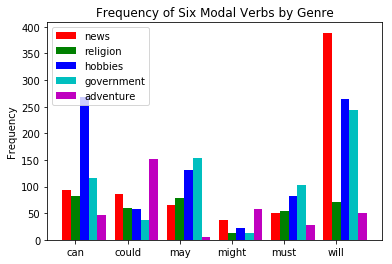

In [133]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
             (genre, word)
             for genre in genres
             for word in nltk.corpus.brown.words(categories=genre)
             if word in modals)

counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

In [137]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name) [1]
        traverse(graph, start, child) [2]

def hyponym_graph(start):
    G = nx.Graph() [3]
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw_graphviz(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

In [ ]:
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

In [138]:
from numpy import array
cube = array([ [[0,0,0], [1,1,1], [2,2,2]],
               [[3,3,3], [4,4,4], [5,5,5]],
              [[6,6,6], [7,7,7], [8,8,8]] ])
cube[1,1,1]

4

In [139]:
cube[2].transpose()

array([[6, 7, 8],
       [6, 7, 8],
       [6, 7, 8]])

In [140]:
cube[2,1:]

array([[7, 7, 7],
       [8, 8, 8]])

In [141]:
from numpy import linalg
a=array([[4,0], [3,-5]])
u,s,vt = linalg.svd(a)
u

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])

In [142]:
s

array([6.32455532, 3.16227766])

In [143]:
vt

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

# Chapter 5 - Tagger

In [12]:
from nltk import pos_tag, word_tokenize
nltk.download('averaged_perceptron_tagger')
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [13]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [14]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [15]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [16]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [17]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


In [18]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [19]:
tagged_token[0]

'fly'

In [20]:
tagged_token[1]

'NN'

In [21]:
sent = '''
 The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
 other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
 Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
 said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
 accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
 interest/NN of/IN both/ABX governments/NNS ''/'' ./.
 '''
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

In [22]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [24]:
nltk.download('universal_tagset')
nltk.corpus.brown.tagged_words(tagset='universal')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [28]:
nltk.download('conll2000')
nltk.download('treebank')
print(nltk.corpus.nps_chat.tagged_words())
print(nltk.corpus.conll2000.tagged_words())
print(nltk.corpus.treebank.tagged_words())

[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]
[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]
[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]


In [29]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [30]:
nltk.corpus.treebank.tagged_words(tagset='universal')

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

In [32]:
nltk.download('sinica_treebank')
nltk.corpus.sinica_treebank.tagged_words()

[nltk_data] Downloading package sinica_treebank to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Unzipping corpora/sinica_treebank.zip.


[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [34]:
nltk.download('indian')
nltk.corpus.indian.tagged_words()

[nltk_data] Downloading package indian to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Unzipping corpora/indian.zip.


[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

In [36]:
nltk.download('mac_morpho')
nltk.corpus.mac_morpho.tagged_words()

[nltk_data] Downloading package mac_morpho to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Unzipping corpora/mac_morpho.zip.


[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [38]:
nltk.download('conll2002')
nltk.corpus.conll2002.tagged_words()

[nltk_data] Downloading package conll2002 to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Unzipping corpora/conll2002.zip.


[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]

In [40]:
nltk.download('cess_cat')
nltk.corpus.cess_cat.tagged_words()

[nltk_data] Downloading package cess_cat to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Unzipping corpora/cess_cat.zip.


[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

In [41]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [42]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

In [43]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']

['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected',
 'buy',
 'take',
 'get',
 'might',
 'sell',
 'added',
 'sold',
 'help',
 'including',
 'should',
 'reported',
 'according',
 'pay',
 'compared',
 'being',
 'fell',
 'began',
 'based',
 'used',
 'closed',
 "'re",
 'want',
 'see',
 'took',
 'yield',
 'offered',
 'set',
 'priced',
 'approved',
 'come',
 'noted',
 'cut',
 'ended',
 'found',
 'increased',
 'become',
 'think',
 'named',
 'go',
 'trying',
 'proposed',
 'received',
 'growing',
 'declined',
 'held',
 'give',
 'came',
 'use',
 'put',
 'making',
 'continue',
 'raise',
 'estimated',
 'called',
 'paid',
 'designed',
 'going',
 'expects',
 'seeking',
 'must',
 'plans',
 'wo',
 'increasing',
 'saying',
 'got',
 'owns',
 'trading',
 'acquired',
 'gained',
 'fined',
 'reached',
 'holding',
 'announced',
 'filed',
 'became',


In [44]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [45]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

In [48]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
list(cfd2['VBN'])

['named',
 'used',
 'caused',
 'exposed',
 'reported',
 'replaced',
 'sold',
 'died',
 'expected',
 'diagnosed',
 'studied',
 'industrialized',
 'owned',
 'found',
 'classified',
 'rejected',
 'outlawed',
 'imported',
 'tracked',
 'thought',
 'considered',
 'elected',
 'based',
 'lifted',
 'ensnarled',
 'voted',
 'been',
 'held',
 'banned',
 'renovated',
 'prolonged',
 'recorded',
 'accumulated',
 'offered',
 'become',
 'guaranteed',
 'proposed',
 'related',
 'improved',
 'worried',
 'cluttered',
 'expedited',
 'retired',
 'ordered',
 'collected',
 'required',
 'received',
 'moved',
 'determined',
 'made',
 'changed',
 'completed',
 'disputed',
 'refunded',
 'estimated',
 'compared',
 'located',
 'filed',
 'scrapped',
 'anticipated',
 'priced',
 'set',
 'applied',
 'existed',
 'incurred',
 'reached',
 'Regarded',
 'paid',
 'trained',
 'instituted',
 'vowed',
 'deemed',
 'combined',
 'removed',
 'concerned',
 'complained',
 'accelerated',
 'believed',
 'called',
 'solved',
 'forgiven',


In [49]:
[w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]]

[]

In [51]:
idx1 = wsj.index(('kicked', 'VBD'))
wsj[idx1-4:idx1+1]

[('While', 'IN'),
 ('program', 'NN'),
 ('trades', 'NNS'),
 ('swiftly', 'RB'),
 ('kicked', 'VBD')]

In [52]:
idx2 = wsj.index(('kicked', 'VBN'))
wsj[idx2-4:idx2+1]

[('head', 'NN'),
 ('of', 'IN'),
 ('state', 'NN'),
 ('has', 'VBZ'),
 ('kicked', 'VBN')]

In [53]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

In [54]:
brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [55]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [58]:
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)
            
for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

attempting to reach
afford to take
forbidden to sit
plans to import
likes to imagine
used to get
trying to make
ceased to suggest
going to work
wanting to cut
choose to persuade
trying to keep
like to embark
suited to defeat
hastened to put
like to add
want to preserve
required to participate
happened to save
doing to promote
tempted to quote
continuing to capture
need to communicate
like to see
interested to know
allowed to rust
chose to devote
left to choose
want to own
plan to become
persuaded to restock
seems to improve
arranged to permit
seem to lend
allowed to mix
starts to swing
seems to stop
ordered to hold
fitted to endure
trying to follow
threatening to explode
rides to break
managed to make
dancing to display
hasten to report
seems to come
reassuring to see
profess to know
help to explain
forced to rely
attempt to homogenize
like to put
continue to try
try to come
seem to deal
decide to let
tries to take
trying to forget
trying to acquire
threatens to linger
decided to foreg

explored to find
trying to throw
designed to find
required to mark
asked to consider
seem to involve
seems to smell
seems to see
learned to develop
arranged to meet
need to work
want to raise
need to bring
expect to grow
expected to work
want to include
going to produce
want to hire
want to buy
want to hire
going to farm
need to know
want to undertake
want to buy
wish to locate
plan to sell
want to go
intend to raise
cost to live
expected to produce
expect to get
forced to lay
trying to explain
happened to light
began to turn
intended to warn
used to transform
forced to overcome
begins to give
failed to post
refused to permit
encouraged to beget
obliged to obey
united to push
try to oppose
made to impose
wanted to clarify
proposed to sail
determined to catch
forced to turn
seemed to sense
seemed to know
tried to brush
turning to repeat
tried to persuade
wanted to turn
preparing to pacify
forced to retreat
contracted to supply
forced to leave
offering to bring
attempt to bring
decided t

tailored to fit
obliged to describe
tried to block
chosen to edit
plotted to take
tried to halt
wanted to die
returned to make
like to believe
bother to look
used to go
seemed to thaw
came to give
wanted to see
used to look
meant to help
like to straighten
hope to give
bark to let
dash to get
tried to talk
decided to leave
used to tell
continue to reflect
appear to preach
intend to let
need to test
learned to meet
said to give
serves to reduce
thought to provide
tends to give
wish to deny
expect to find
seek to capture
allowed to claim
seeks to recapture
determined to bulldoze
sought to run
needed to make
hurry to catch
planned to bolt
fit to nominate
intend to support
refusing to abandon
begun to parallel
help to give
fail to convey
tends to lose
aimed to write
granted to serve
tends to underestimate
permitted to cross
demanding to know
obliged to remain
delighted to make
seem to shake
assigned to check
volunteered to advance
went to hurry
refused to notice
began to select
began to sp

made to characterize
expect to find
known to cause
allowed to stand
allowed to stand
used to test
allowed to clot
need to make
try to key
manage to keep
seem to prefer
continues to add
begin to play
begin to appear
begin to dig
cease to lay
manages to slip
seem to recognize
like to burrow
like to think
estimated to contain
love to visit
fail to show
attempts to weigh
given to complete
required to reach
prove to belong
varied to allow
noted to draw
noted to occur
permitted to speculate
designed to stop
failing to demonstrate
failed to demonstrate
applied to man
begin to ossify
seen to begin
constructed to serve
wishes to study
attempted to simplify
coupled to form
appear to affect
appear to act
presumed to occur
found to contain
appears to result
used to obtain
like to re-emphasise
adopted to make
failed to change
failed to show
thought to represent
failed to show
attempting to improve
allowed to react
used to filter
photographed to show
thought to represent
seems to follow
known to con

wait to see
adjusted to supply
utilized to direct
tried to make
jumping to anticipate
tried to tempt
Try to get
bothered to phone
allowed to make
go to school
wants to pay
seemed to speak
wired to set
tried to shake
going to follow
served to overheat
seemed to crouch
seemed to advance
seemed to resist
began to write
refuse to mention
needed to eat
wanting to know
stop to grasp
dared to defy
hoping to store
going to get
want to get
trying to talk
determined to go
proposed to rebuild
going to stay
plan to repair
Hope to see
used to take
want to kill
intend to go
wanted to hurt
bother to think
delighted to see
began to weep
began to move
tried to push
tried to rescue
seemed to hold
began to think
strove to think
run to tell
fail to hear
dared to wait
dared to pat
trying to push
began to whirl
started to worry
tried to push
wanted to get
tryin to fuck
tried to stifle
seeking to kill
failed to check
tried to shut
refuses to believe
begun to study
amazed to discover
appear to reject
trying t

learning to think
delighted to encounter
wanted to explain
taught to grow
Taught to grow
opened to sell
required to assume
want to make
got to hold
want to inquire
seemed to spend
preoccupied to cook
asked to speak
pacing to stare
wished to make
began to build
needed to carry
meaning to live
agreed to help
agreed to take
contract to let
refused to believe
meant to invade
going to turn
got to intercept
permitted to go
failed to anticipate
needed to make
use to make
help to repel
seems to shield
pretending to sleep
threatening to report
seem to concentrate
want to give
trying to pull
adjusted to operate
like to see
bent to observe
forced to accompany
fear to tread
programed to compute
remember to program
directed to develop
schooled to examine
appeared to require
encouraged to develop
remembered to introduce
guided to make
tried to run
tried to tell
tried to ask
want to ask
going to come
going to happen
going to happen
going to take
inclined to think
manage to follow
wanting to tell
trie

come to talk
seem to remember
want to hear
trying to get
forgot to say
seemed to believe
wanted to get
wanted to see
wanted to touch
got to entertain
tried to keep
going to tell
thought to mix
going to jump
beginning to catch
try to see
phoned to say
bothering to look
forced to wipe
used to pretend
refused to approach
used to express
proceeds to lash
used to hang
seeks to expunge
trying to redeem
seemed to take
tried to conceal
came to know
refuses to continue
continue to scrape
given to understand
propose to vent
proceeded to mask
withhold to keep
begin to wither
help to intensify
seems to overtake
want to buy


In [60]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                 for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
     if len(data[word]) > 3:
         tags = [tag for (tag, _) in data[word].most_common()]
         print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


In [61]:
pos = {}
pos

{}

In [62]:
pos['colorless'] = 'ADJ' [1]
pos

{'colorless': 'D'}

In [63]:
pos['ideas'] = 'N'
pos['sleep'] = 'V'
pos['furiously'] = 'ADV'
pos

{'colorless': 'D', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [64]:
pos['ideas']

'N'

In [65]:
pos['colorless']

'D'

In [67]:
list(pos)

['colorless', 'ideas', 'sleep', 'furiously']

In [68]:
sorted(pos)

['colorless', 'furiously', 'ideas', 'sleep']

In [69]:
[w for w in pos if w.endswith('s')]

['colorless', 'ideas']

In [70]:
for word in sorted(pos):
    print(word + ":", pos[word])

colorless: D
furiously: ADV
ideas: N
sleep: V


In [71]:
list(pos.keys())

['colorless', 'ideas', 'sleep', 'furiously']

In [72]:
list(pos.values())

['D', 'N', 'V', 'ADV']

In [73]:
list(pos.items())

[('colorless', 'D'), ('ideas', 'N'), ('sleep', 'V'), ('furiously', 'ADV')]

In [74]:
for key, val in sorted(pos.items()): 
     print(key + ":", val)

colorless: D
furiously: ADV
ideas: N
sleep: V


In [75]:
pos['sleep'] = 'V'
pos['sleep']

'V'

In [76]:
pos['sleep'] = 'N'
pos['sleep']

'N'

In [78]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos = dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [79]:
from collections import defaultdict
frequency = defaultdict(int)
frequency['colorless'] = 4
frequency['ideas']

0

In [80]:
pos = defaultdict(list)
pos['sleep'] = ['NOUN', 'VERB']
pos['ideas']

[]

In [81]:
pos = defaultdict(lambda: 'NOUN')
>>> pos['colorless'] = 'ADJ'
>>> pos['blog']

'NOUN'

In [82]:
list(pos.items())

[('colorless', 'ADJ'), ('blog', 'NOUN')]

In [83]:
f = lambda: 'NOUN'
f()

'NOUN'

In [84]:
def g():
    return 'NOUN'
g()

'NOUN'

In [85]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')
for v in v1000:
    mapping[v] = v
    
alice2 = [mapping[v] for v in alice]
alice2[:100]

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'UNK',
 'UNK',
 'UNK',
 'UNK',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'UNK',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'UNK',
 'in',
 'it',
 ',',
 "'",
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ",'",
 'thought',
 'Alice',
 "'",
 'without',
 'pictures',
 'or',
 'conversation',
 "?'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',']

In [86]:
len(set(alice2))

1001

In [87]:
from collections import defaultdict
counts = defaultdict(int)
from nltk.corpus import brown
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1
    
counts['NOUN']

30654

In [88]:
sorted(counts)

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

In [89]:
from operator import itemgetter
sorted(counts.items(), key=itemgetter(1), reverse=True)

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [90]:
[t for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)]

['NOUN',
 'VERB',
 'ADP',
 '.',
 'DET',
 'ADJ',
 'ADV',
 'CONJ',
 'PRON',
 'PRT',
 'NUM',
 'X']

In [91]:
pair = ('NP', 8336)
pair[1]

8336

In [92]:
itemgetter(1)(pair)
8336

8336

In [94]:
nltk.download('words')
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)
    
last_letters['ly']

[nltk_data] Downloading package words to
[nltk_data]     /Users/sathwikmattapally/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


['abactinally',
 'abandonedly',
 'abasedly',
 'abashedly',
 'abashlessly',
 'abbreviately',
 'abdominally',
 'abhorrently',
 'abidingly',
 'abiogenetically',
 'abiologically',
 'abjectly',
 'ableptically',
 'ably',
 'abnormally',
 'abominably',
 'aborally',
 'aboriginally',
 'abortively',
 'aboundingly',
 'abridgedly',
 'abruptedly',
 'abruptly',
 'abscondedly',
 'absently',
 'absentmindedly',
 'absolutely',
 'absolutistically',
 'absorbedly',
 'absorbingly',
 'absorptively',
 'abstemiously',
 'abstinently',
 'abstractedly',
 'abstractively',
 'abstractly',
 'abstrusely',
 'absurdly',
 'abundantly',
 'abusedly',
 'abusefully',
 'abusively',
 'abysmally',
 'academically',
 'acceleratedly',
 'accentually',
 'acceptably',
 'acceptedly',
 'accessarily',
 'accessibly',
 'accessively',
 'accessorily',
 'accidentally',
 'accidently',
 'accommodately',
 'accommodatingly',
 'accordantly',
 'accordingly',
 'accountably',
 'accumulatively',
 'accurately',
 'accursedly',
 'accusably',
 'accusative

In [95]:
last_letters['zy']

['blazy',
 'bleezy',
 'blowzy',
 'boozy',
 'breezy',
 'bronzy',
 'buzzy',
 'Chazy',
 'cozy',
 'crazy',
 'dazy',
 'dizzy',
 'dozy',
 'enfrenzy',
 'fezzy',
 'fizzy',
 'floozy',
 'fozy',
 'franzy',
 'frenzy',
 'friezy',
 'frizzy',
 'frowzy',
 'furzy',
 'fuzzy',
 'gauzy',
 'gazy',
 'glazy',
 'groszy',
 'hazy',
 'heezy',
 'Izzy',
 'jazzy',
 'Jozy',
 'lawzy',
 'lazy',
 'mazy',
 'mizzy',
 'muzzy',
 'nizy',
 'oozy',
 'quartzy',
 'quizzy',
 'refrenzy',
 'ritzy',
 'Shortzy',
 'sizy',
 'sleazy',
 'sneezy',
 'snoozy',
 'squeezy',
 'Suzy',
 'tanzy',
 'tizzy',
 'topazy',
 'trotcozy',
 'twazzy',
 'unbreezy',
 'unfrizzy',
 'wheezy',
 'woozy',
 'wuzzy',
 'yezzy']

In [97]:
anagrams = defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)
    
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

In [98]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

In [99]:
pos = defaultdict(lambda: defaultdict(int))
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged): 
    pos[(t1, w2)][t2] += 1
    
pos[('DET', 'right')]

defaultdict(int, {'NOUN': 5, 'ADJ': 11})

In [101]:
counts = defaultdict(int)
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
    counts[word] += 1
[key for (key, value) in counts.items() if value == 32]

['mortal',
 'Against',
 'Him',
 'There',
 'brought',
 'King',
 'virtue',
 'every',
 'been',
 'thine']

In [102]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for (key, value) in pos.items())
pos2['N']

'ideas'

In [104]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = defaultdict(list)
for key, value in pos.items():
    pos2[value].append(key)
pos2['ADV']

['furiously', 'peacefully']

In [105]:
pos2 = nltk.Index((value, key) for (key, value) in pos.items())
pos2['ADV']

['furiously', 'peacefully']

In [107]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [108]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [109]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

In [110]:
patterns = [
    (r'.*ing$', 'VBG'),               # gerunds
    (r'.*ed$', 'VBD'),                # simple past
    (r'.*es$', 'VBZ'),                # 3rd singular present
    (r'.*ould$', 'MD'),               # modals
    (r'.*\'s$', 'NN$'),               # possessive nouns
    (r'.*s$', 'NNS'),                 # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')                     # nouns (default)
]

In [111]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [112]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

In [113]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [114]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

In [115]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))

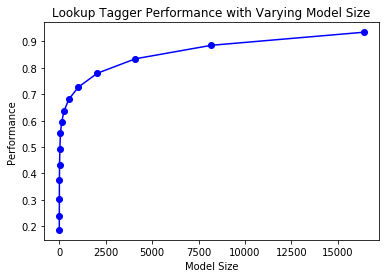

In [119]:
from matplotlib import pylab
from pylab import *
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    #import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
    
display()

In [120]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [121]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

In [122]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [123]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

In [124]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [125]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [126]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

In [127]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

In [128]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

In [129]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [130]:
text = """The board's action shows what free enterprise
    is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

In [131]:
cfd = nltk.ConditionalFreqDist(
           ((x[1], y[1], z[0]), z[1])
           for sent in brown_tagged_sents
           for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


0.049297702068029296

In [132]:
test_tags = [tag for sent in brown.sents(categories='editorial')
                 for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
print(nltk.ConfusionMatrix(gold_tags, test_tags))

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            